In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

path=r"C:\Users\DELL\Desktop\stage_pfe\testDUM\all_data\100000ligne_28feature.csv"

df = pd.read_csv(path,delimiter=',')
df

# PREPROCESS

In [2]:
c=0
for i in list(df['IDENTIFIANT_DUM'].value_counts()):
    if i == 1: 
        c+=1

c


75636

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
# Check for rows where all column values are identical to their duplicates
duplicated_rows = df[df.duplicated(keep=False)]

# Display the duplicated rows
duplicated_rows

,IDENTIFIANT_DUM,ID_OPERATEUR,DECLARANT_POUR_LUI_MEME,ID_TRANSITAIRE,PROVENANCE,ANTICIPATION,COMBINEE,PROVISIONNELLE,BUREAU_SOUSCRIPTION,REGIME_SOUSCRIPTION,...,NGPV0,CONTENANTS,ARTICLESAPSP,PAYSORIGINE,POIDV0,QUANTITEV0,ASCODEUNITEMESUREV0,ADUM_NUM_QUANTNORMV0,VALEURV0,FRAUD


In [ ]:
df.dtypes

In [7]:
df['VALEURV0']=df['VALEURV0'].astype(str).str.replace(',','.')
df['VALEURV0']=df['VALEURV0'].astype(float)

In [8]:
def ppt1(df):
    df['VALEURV0']=df['VALEURV0'].astype(str).str.replace(',','.')
    df['VALEURV0']=df['VALEURV0'].astype(float)
    return df

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [11]:
d={}
non_changeable=[]
changeable=[]
for c in df.keys():
    d[c]=df[c].value_counts()
    if len(d[c]) > 14:
        non_changeable.append(c)
    else:
        changeable.append(c)


In [13]:
d

{'IDENTIFIANT_DUM': IDENTIFIANT_DUM
 20867990    17
 21830359    17
 21978316    16
 27623298    15
 20324002    14
             ..
 24908005     1
 24792694     1
 25911106     1
 21217464     1
 22489049     1
 Name: count, Length: 88066, dtype: int64,
 'ID_OPERATEUR': ID_OPERATEUR
 33886     8696
 10287     1649
 165062    1346
 147058    1304
 250234    1259
           ... 
 497282       1
 7920         1
 266446       1
 340736       1
 426522       1
 Name: count, Length: 16026, dtype: int64,
 'DECLARANT_POUR_LUI_MEME': DECLARANT_POUR_LUI_MEME
 N    94644
 O    11812
 Name: count, dtype: int64,
 'ID_TRANSITAIRE': ID_TRANSITAIRE
 270887    8367
 1086      5378
 39853     3337
 1130      3203
 1255      2893
           ... 
 9101         1
 301017       1
 716608       1
 15535        1
 681691       1
 Name: count, Length: 1984, dtype: int64,
 'PROVENANCE': PROVENANCE
 ES    38932
 FR    18848
 IT     8000
 CN     6410
 DE     6099
       ...  
 PS        1
 TM        1
 MU       

In [14]:
changeable.remove('FRAUD')
changeable.remove('PROVISIONNELLE')
df.drop(columns='PROVISIONNELLE',inplace=True) #may be added in 7M (removed becuz there was only one class(N))

In [15]:
df1=df[df['FRAUD']==1]
df0=df[df['FRAUD']==0]

In [16]:
pp={} #the preprocess is kept here for the new data

In [17]:
#replace binary classes (N,O) with (1,0) depanding on our target fraud
for c in changeable:
    if len(d[c])==2:
        v1=list(d[c].keys())[0]
        v2=list(d[c].keys())[1]

        if len(df1[df1[c]==v1]) > len(df0[df0[c]==v1]):
            df[c].replace(v1,1,inplace=True)
            df[c].replace(v2,0,inplace=True)
            pp[c]={v1:1,v2:0}

        else:
            df[c].replace(v1,0,inplace=True)
            df[c].replace(v2,1,inplace=True)
            pp[c]={v1:0,v2:1}
            

In [18]:
pp

{'DECLARANT_POUR_LUI_MEME': {'N': 0, 'O': 1},
 'ANTICIPATION': {'N': 0, 'O': 1},
 'COMBINEE': {'N': 0, 'O': 1},
 'RESELECTION': {'N': 0, 'O': 1},
 'ARTICLESAPSP': {'AP': 0, 'SP': 1}}

In [19]:
list(pp.keys())

['DECLARANT_POUR_LUI_MEME',
 'ANTICIPATION',
 'COMBINEE',
 'RESELECTION',
 'ARTICLESAPSP']

In [20]:
def ppt2(df):
    for c in list(pp.keys()):
        for v in list(pp[c].keys()):
            print(c)
            df[c].replace(v, pp[c][v], inplace=True)
    return df

df=ppt2(df)


DECLARANT_POUR_LUI_MEME
DECLARANT_POUR_LUI_MEME
ANTICIPATION
ANTICIPATION
COMBINEE
COMBINEE
RESELECTION
RESELECTION
ARTICLESAPSP
ARTICLESAPSP


In [21]:
changeable

['DECLARANT_POUR_LUI_MEME',
 'ANTICIPATION',
 'COMBINEE',
 'RESELECTION',
 'ARTICLESAPSP']

In [23]:
ids=['IDENTIFIANT_DUM']
for_mean_encoding=['PROVENANCE','BUREAU_SOUSCRIPTION','REGIME_SOUSCRIPTION','PAYSORIGINE','ASCODEUNITEMESUREV0','NGPV0','ID_OPERATEUR','ID_TRANSITAIRE','ARDDD']
to_remove=['AGENT_COTE','NUMEROORDRE','CONTENANTS']
#special_treatment=['ASCODEUNITEMESUREV0']

In [24]:
df.drop(columns=to_remove+ids,inplace=True)


In [25]:
df.drop(columns=['DATEENREGISTREMENT','DATEDEPOT'],inplace=True)

In [26]:
me={} #store mean_encoding data to preprocess the new data
for c in for_mean_encoding:
    mean_encoding = df.groupby(c)['FRAUD'].mean().to_dict()
    me[c]=mean_encoding
    df[c] = df[c].map(mean_encoding)

In [27]:
#df.drop(columns=address+ids,inplace=True)

In [ ]:
list(me.keys())

In [30]:
def ppt3(df):
    for c in list(me.keys()):
        for v in list(me[c].keys()):
            df[c].replace(v, me[c][v], inplace=True)
    return df
    

In [35]:
df.to_csv("My_preprocessing33333.csv",index=False,sep=',')

In [36]:

X = df.drop('FRAUD', axis=1)  # Features
y = df['FRAUD']  # Target variable


# CORRELATION

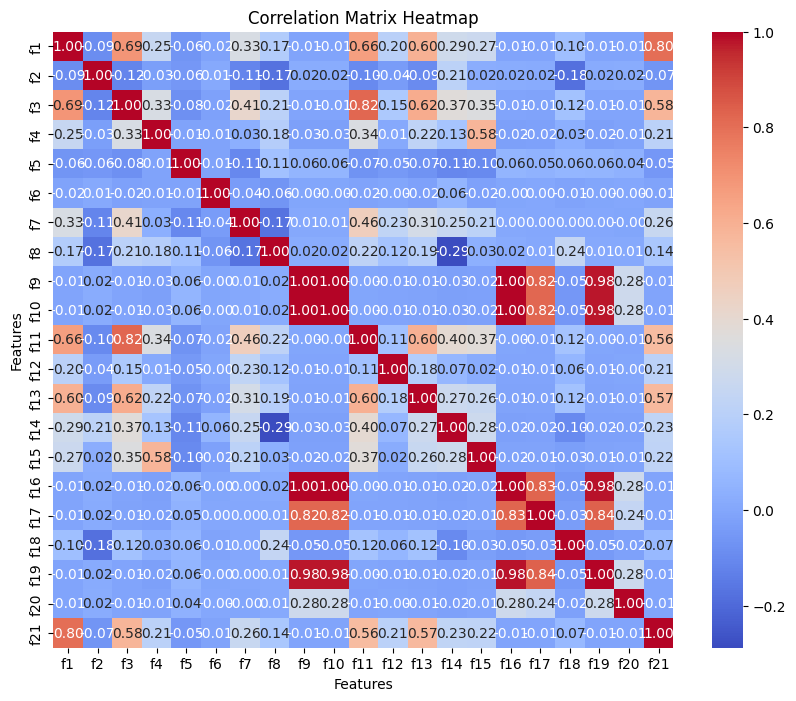

In [69]:
#to rename 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

new_columns=[f'f{i+1}' for i, col in enumerate(df.columns)]
df.columns=new_columns

# Assuming you have a DataFrame 'df' with a 'FRAUD' column and other numeric columns
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

# XGBOOST MEDOL

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

model = xgb.XGBClassifier(max_depth=0,
                        sampling_method="gradient_based",
                        booster="dart",
                        subsample=0.075,
                        tree_method="gpu_hist",
                        objective='binary:logistic',
                        n_estimators=20000,
                        learning_rate = 0.01)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=30, eval_metric=["error", "logloss"] , eval_set=eval_set, verbose=True)

c:\Users\DELL\.conda\envs\newpycaret\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\DELL\.conda\envs\newpycaret\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.03152	validation_0-logloss:0.68386	validation_1-error:0.03344	validation_1-logloss:0.68389
[1]	validation_0-error:0.02730	validation_0-logloss:0.67476	validation_1-error:0.02719	validation_1-logloss:0.67479
[2]	validation_0-error:0.02603	validation_0-logloss:0.66581	validation_1-error:0.02743	validation_1-logloss:0.66588
[3]	validation_0-error:0.02447	validation_0-logloss:0.65702	validation_1-error:0.02550	validation_1-logloss:0.65709
[4]	validation_0-error:0.02394	validation_0-logloss:0.64841	validation_1-error:0.02550	validation_1-logloss:0.64850
[5]	validation_0-error:0.02365	validation_0-logloss:0.64000	validation_1-error:0.02419	validation_1-logloss:0.64011
[6]	validation_0-error:0.02305	validation_0-logloss:0.63175	validation_1-error:0.02452	validation_1-logloss:0.63189
[7]	validation_0-error:0.02299	validation_0-logloss:0.62365	validation_1-error:0.02376	validation_1-logloss:0.62379
[8]	validation_0-error:0.02237	validation_0-logloss:0.61567	validation_1

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:
y_pred3 = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Print confusion matrix
cm2 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(cm2)

Accuracy: 0.9796637234642119
Confusion Matrix:
[[19770   204]
 [  229  1089]]


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

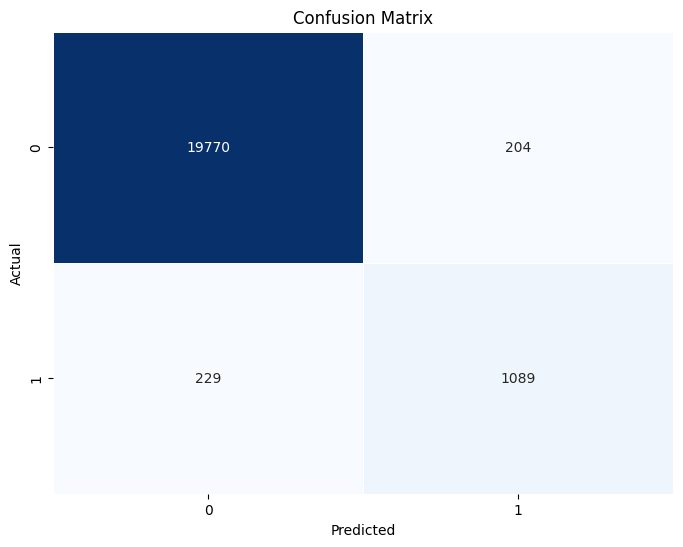

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

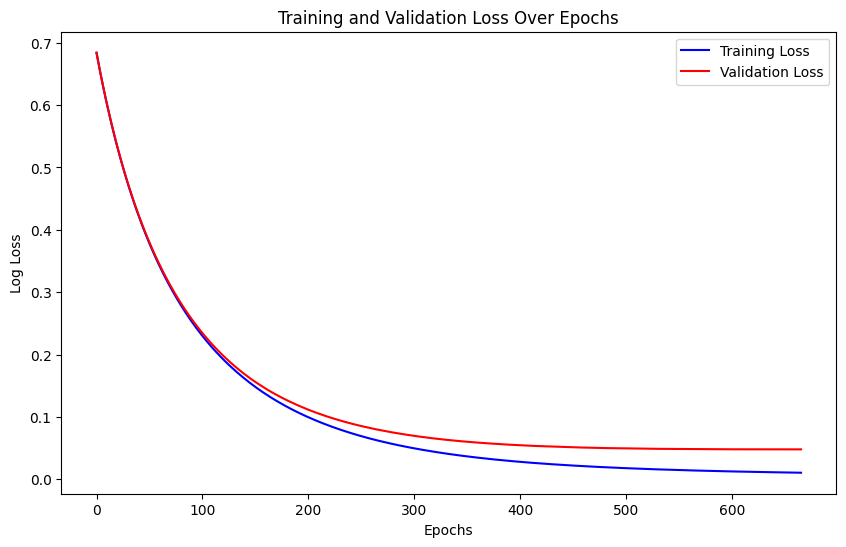

In [66]:
import matplotlib.pyplot as plt

evals_result = model.evals_result()
train_loss = evals_result['validation_0']['logloss']
val_loss = evals_result['validation_1']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


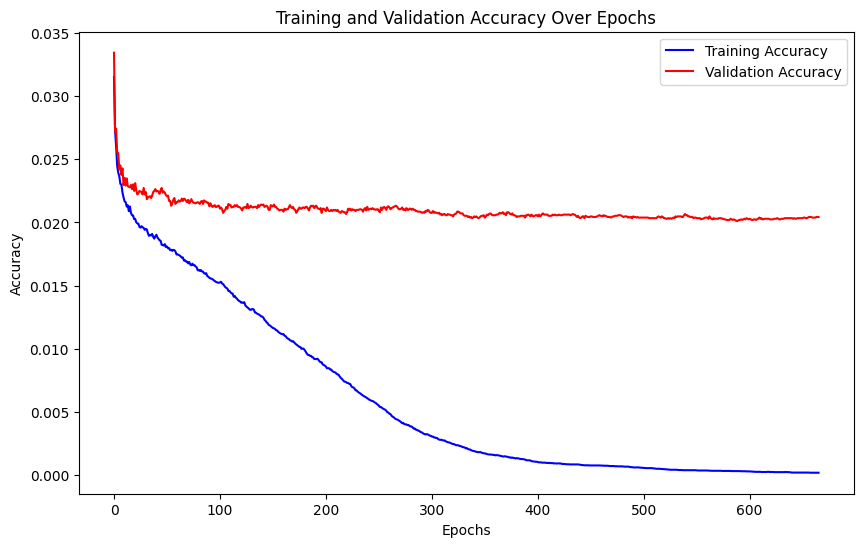

In [67]:
train_accuracy = evals_result['validation_0']['error']
val_accuracy = evals_result['validation_1']['error']

plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()
